# Example usage of OrganDetection class

In [1]:
%pylab inline

import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.WARNING)

import sys, os

# os.system("python -m io3d -l 3Dircadb1.1")
DATA_PATH = "3Dircadb1.1/PATIENT_DICOM"
import io3d

#PKG_PATH = "~/projects/bodynavigation"
PKG_PATH = "~/Programming/Sources/bodynavigation"
sys.path.append(os.path.expanduser(PKG_PATH))
from bodynavigation.organ_detection import OrganDetection

import matplotlib.pyplot as plt
import sed3

def show_segmented_slices(data3d, seg, axis=0):
    seg = seg.astype(np.uint8)
    shape = None
    if axis == 0: shape = [3,3]
    elif axis == 1: shape = [9,3]
    plt.figure(figsize = (15,15))
    sed3.show_slices(data3d, contour=(seg*2).astype(np.uint8), slice_step=20, axis=axis, shape=shape)

Populating the interactive namespace from numpy and matplotlib


## Initialization

In [2]:
data3d, metadata = io3d.datareader.read(io3d.datasets.join_path(DATA_PATH), dataplus_format=False)
voxelsize = metadata["voxelsize_mm"]
obj = OrganDetection(data3d, voxelsize)

## Segmentation

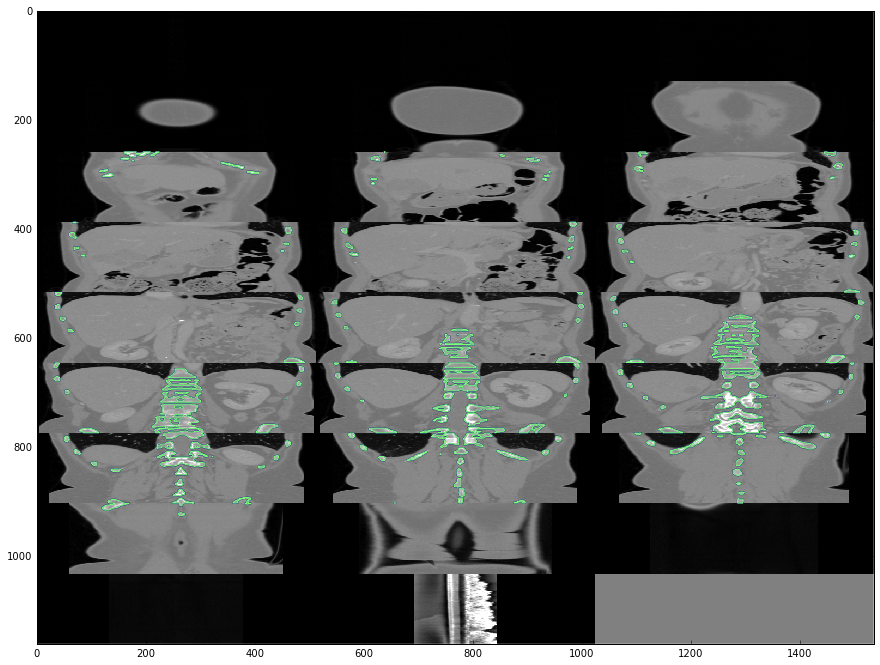

In [3]:
seg = obj.getBones()
# OR
seg = obj.getPart("bones")

show_segmented_slices(data3d, seg, axis=1)

List of valid bodypart names:

In [4]:
print(list(obj.masks_comp))

['body', 'fatlessbody', 'bones', 'venacava', 'aorta', 'lungs', 'diaphragm', 'kidneys', 'abdomen', 'vessels']


## Analysis of segmented data

In [5]:
data = obj.analyzeBones()
# OR
data = obj.analyzePart("bones")

print(data)

{'spine': [(0, 360, 263), (0, 360, 263), (1, 358, 263), (1, 358, 263), (2, 358, 263), (2, 358, 263), (3, 357, 263), (3, 357, 263), (4, 357, 263), (4, 357, 263), (5, 355, 263), (6, 355, 263), (6, 355, 264), (7, 355, 264), (7, 355, 264), (8, 354, 264), (8, 354, 264), (9, 354, 264), (9, 354, 264), (10, 352, 264), (10, 352, 264), (11, 352, 264), (12, 352, 264), (12, 350, 264), (13, 350, 264), (13, 350, 264), (14, 350, 264), (14, 349, 264), (15, 349, 264), (15, 349, 264), (16, 349, 264), (16, 347, 264), (17, 347, 264), (18, 347, 264), (18, 347, 264), (19, 345, 264), (19, 345, 264), (20, 345, 264), (20, 345, 265), (21, 344, 265), (21, 344, 265), (22, 344, 265), (22, 342, 265), (23, 342, 265), (24, 342, 265), (24, 342, 265), (25, 340, 265), (25, 340, 265), (26, 340, 265), (26, 340, 265), (27, 339, 265), (27, 339, 265), (28, 339, 265), (28, 339, 265), (29, 337, 265), (30, 337, 265), (30, 337, 265), (31, 337, 265), (31, 335, 265), (32, 335, 265), (32, 335, 264), (33, 335, 264), (33, 334, 264), 

List of valid bodypart names for analysis:

In [6]:
print(list(obj.stats))

['bones', 'vessels', 'lungs']


## Dumping and loading processed data
Dumping all processed data into directory:

In [7]:
# create temporary directory
import tempfile, shutil
TMP_DIR = tempfile.mkdtemp()

# dump all processed data
obj.toDirectory(TMP_DIR)

# print list of dumped files
print(os.listdir(TMP_DIR)) 

['lungs.json', 'bones.dcm', 'body.dcm', 'kidneys.dcm', 'data3d.dcm', 'fatlessbody.dcm', 'lungs.dcm', 'data3d.json', 'bones.json']


Initialization of OrganDetection from directory:

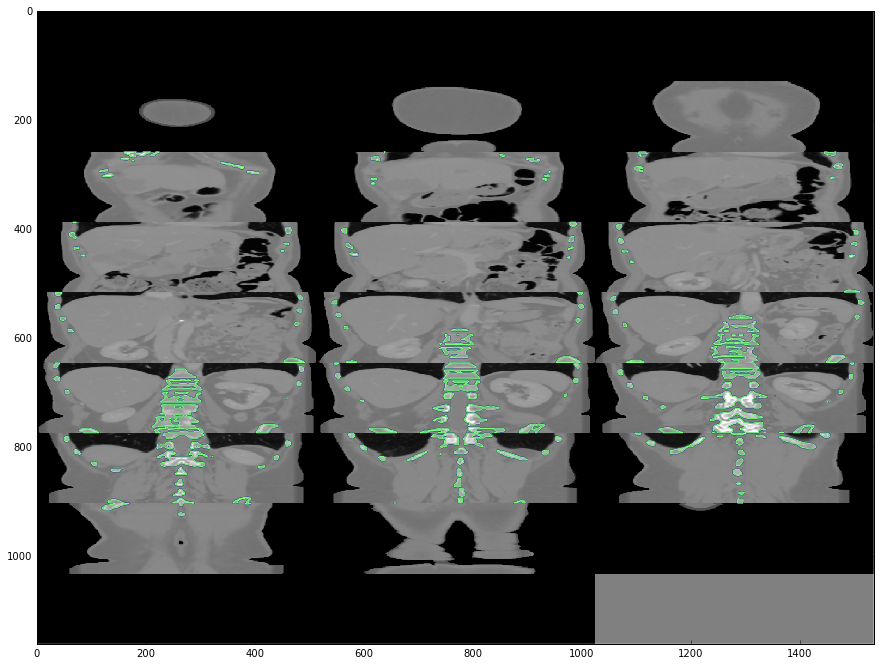

In [8]:
# init organ_detection from directory
obj = OrganDetection.fromDirectory(TMP_DIR)

# remove dumped processed data
shutil.rmtree(TMP_DIR)

# confirm it works
show_segmented_slices(obj.getData3D(), obj.getBones(), axis=1)

## Directly using segmentation algorithms

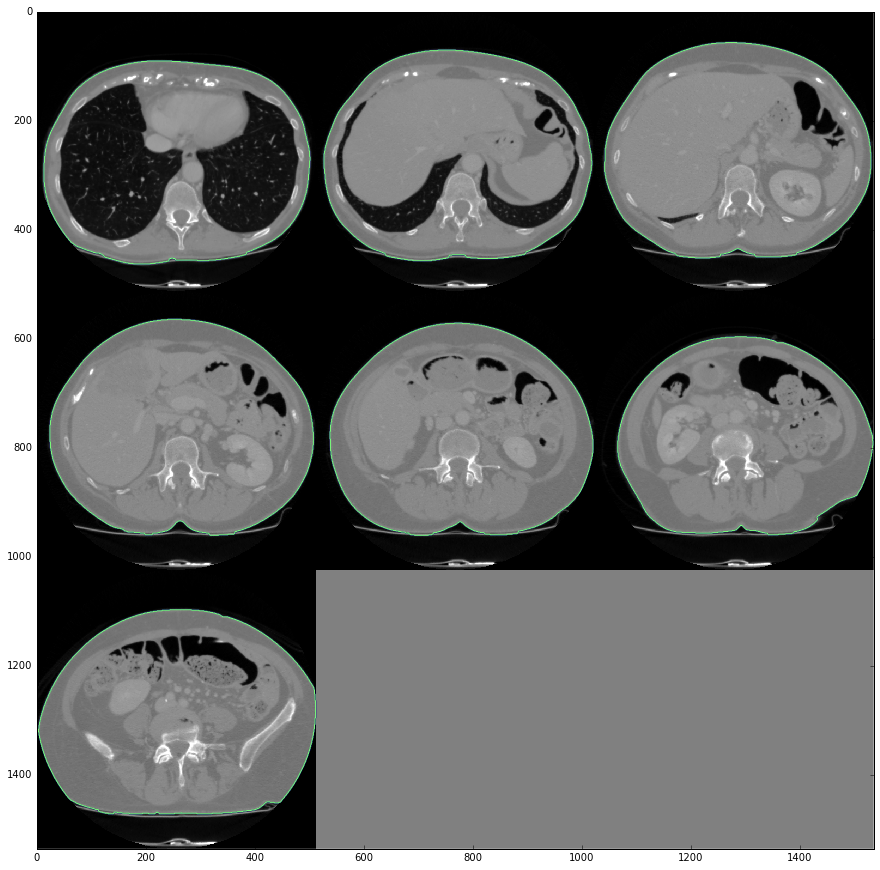

In [9]:
from bodynavigation.organ_detection_algo import OrganDetectionAlgo

seg = OrganDetectionAlgo.getBody(data3d, voxelsize)

show_segmented_slices(data3d, seg, axis=0)

## Using from commandline

```
usage: organ_detection.py [-h] [-i DATADIR] [-r READYDIR] [--dump DUMP]
                          [--draw DRAW] [--drawdepth] [--show SHOW] [-d]

Organ Detection

optional arguments:
  -h, --help            show this help message and exit
  -i DATADIR, --datadir DATADIR
                        path to data dir
  -r READYDIR, --readydir READYDIR
                        path to ready data dir (for testing)
  --dump DUMP           process and dump all data to path and exit
  --draw DRAW           draw and show segmentation results for specified
                        parts. example: "bones,vessels,lungs"
  --drawdepth           draw image in solid depth mode.
  --show SHOW           Show one specific segmented part with sed3 viewer.
                        example: "bones"
  -d, --debug           run in debug mode
```

Example commands:

```
.../bodynavigation $ python -m bodynavigation.organ_detection -i ./3Dircadb1.1 --dump ./READY_DATA
.../bodynavigation $ python -m bodynavigation.organ_detection -d -r ./READY_DATA/3Dircadb1.1 --draw bones
```

## Mass processing of datasets

Script to process datasets in mass is located in scripts/batch_organ_detection.py. 

It requires a directory with subdirectories that have data to be processed. --parts parameter defines what parts should be segmented/analysed. --dump parameter is required if you want to save processed data. --outputdir parameter defines where to put images created by ResultsDrawer class. Setting --threads to number of CPU cores speeds up processing (as long as you have enough RAM).

```
usage: batch_organ_detection.py [-h] [-i DATADIRS] [-o OUTPUTDIR] [-t THREADS]
                                [-m MEMORYLIMIT] [-p PARTS] [--dump DUMP]
                                [-r READYDIRS] [--drawdepth] [-d]

Batch Processing. Needs to be SIGKILLed to terminate

optional arguments:
  -h, --help            show this help message and exit
  -i DATADIRS, --datadirs DATADIRS
                        path to dir with data dirs
  -o OUTPUTDIR, --outputdir OUTPUTDIR
                        path to output dir
  -t THREADS, --threads THREADS
                        How many processes (CPU cores) to use. Max expected
                        MEM usage for abdomen only data is around 2GB, for
                        whole body data it's around 5GB.
  -m MEMORYLIMIT, --memorylimit MEMORYLIMIT
                        How many GB of VIRTUAL memory are individual threads
                        allowed before they are terminated. Might only work on
                        Unix systems. Default is unlimited
  -p PARTS, --parts PARTS
                        Body parts to process sparated by ",", Use "None" to
                        disable, defaults: "bones_stats,vessels,vessels_stats"
  --dump DUMP           dump all processed data to dir in path
  -r READYDIRS, --readydirs READYDIRS
                        path to dir with dirs with preporcessed data3d.dcm and
                        masks
  --drawdepth           draw image in solid depth mode.
  -d, --debug           run in debug mode
```

Example command:

```
.../bodynavigation/scripts $ python batch_organ_detection.py -d -o ./batch_output/ -i ../test_data_3Dircadb1/ -r ../READY_DIR_NEW/ --dump ../READY_DIR_NEW/ -p lungs,bones,bones_stats,kidneys,vessels -t 4
```
